In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
import osmnx as ox
import pandas as pd
import numpy as np
from Data import Data 
import networkx as nx
from networkx import algorithms 
import math
from numpy import arctan2, sin, cos, sqrt, radians

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score

/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
import pydeck as pdk
import json

In [17]:
df = pd.read_pickle("Data_sample.pkl")
X = df.copy()
X=df.drop(['type'], axis=1)

In [8]:
X.head()

lat        lon    speed  lon_acc  lat_acc  traveled_d  \
id time                                                                
1  0.00  37.977482  23.735405  34.0206  -0.0167   0.0074      320.26   
   0.04  37.977485  23.735402  34.0197   0.0040   0.0086      320.26   
   0.08  37.977488  23.735400  34.0211   0.0167   0.0097      320.26   
   0.12  37.977491  23.735398  34.0245   0.0294   0.0108      320.26   
   0.16  37.977494  23.735395  34.0305   0.0540   0.0120      320.26   

         avg_speed  
id time             
1  0.00  35.366264  
   0.04  35.366264  
   0.08  35.366264  
   0.12  35.366264  
   0.16  35.366264

In [9]:
graph = ox.graph_from_address('Athens, Municipality of Athens, Regional Unit of Central Athens, Attica, 10667, Greece', network_type='drive') 

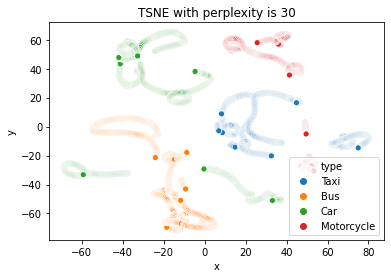

In [10]:
# Perform the TSNE non-linear dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=1000)
data_tsne = tsne.fit_transform(X)

#concatenate the projected (x,y) coordinates (df_tsne) and the original dataset (df) into the same dataset.
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
dff = pd.concat([df, df_tsne], axis=1)

# Plot the projected (x,y) coordinates
sns.scatterplot(x='x', y='y', hue="type", data=dff)
plt.title("TSNE with perplexity is 30")
plt.show()

In [11]:
TRIPS_LAYER_DATA = "https://raw.githubusercontent.com/visgl/deck.gl-data/master/website/sf.trips.json"  # noqa

df = pd.read_json(TRIPS_LAYER_DATA)

df["coordinates"] = df["waypoints"].apply(lambda f: [item["coordinates"] for item in f])
df["timestamps"] = df["waypoints"].apply(lambda f: [item["timestamp"] - 1554772579000 for item in f])

df.drop(["waypoints"], axis=1, inplace=True)
df

,coordinates,timestamps
0,"[[-122.39079879999997, 37.7664413], [-122.3908...","[0, 9, 54, 92, 345, 402, 462, 563, 880, 1070, ..."


In [12]:
layer = pdk.Layer(
    "TripsLayer",
    df,
    get_path="coordinates",
    get_timestamps="timestamps",
    get_color=[253],
    opacity=0.8,
    width_min_pixels=5,
    rounded=True,
    trail_length=600,
    current_time=500,
)

view_state = pdk.ViewState(latitude=37.7749295, longitude=-122.4194155, zoom=11, bearing=0, pitch=45)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html("trips_layer.html")
r.show()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"bea…

In [18]:
coordinates = [[i, j] for i,j in zip(df[df['type']=='Taxi']['lon'], df[df['type']=='Taxi']['lat'])]
dfx = pd.DataFrame({"coordinates": [coordinates], "timestamps" : [np.arange(0,3200,4).tolist()]})
dfx

,coordinates,timestamps
0,"[[23.735405, 37.977482], [23.735402, 37.977485...","[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, ..."


In [28]:
layer = pdk.Layer(
    "TripsLayer",
    dfx,
    get_path="coordinates",
    get_timestamps="timestamps",
    get_color=[253],
    opacity=0.8,
    width_min_pixels=5,
    rounded=True,
    trail_length=600,
    current_time=500,
)
view_state = pdk.ViewState(latitude=37.977482, longitude=23.735405, zoom=15, bearing=0, pitch=45)

In [33]:
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html("trips_layer.html")

In [30]:
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.show()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"bea…

In [21]:
coordinates = [[i, j] for i,j in zip(df[df['type']=='Bus']['lon'], df[df['type']=='Bus']['lat'])]
dfk = pd.DataFrame({"coordinates": [coordinates], "timestamps" : [np.arange(0,3200,4).tolist()]})
dfk

,coordinates,timestamps
0,"[[23.735016, 37.978025], [23.735015, 37.978027...","[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, ..."


In [24]:
layer = pdk.Layer(
    "TripsLayer",
    dfk,
    get_path="coordinates",
    get_timestamps="timestamp",
    get_color=[253],
    opacity=0.8,
    width_min_pixels=5,
    rounded=True,
    trail_length=600,
    current_time=500,
)
view_state = pdk.ViewState(latitude=37.977482, longitude=23.735405, zoom=15, bearing=0, pitch=45)

In [25]:
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html("trips_layer.html")